In [21]:
%load_ext nb_black
%load_ext autoreload
%autoreload 2

The nb_black extension is already loaded. To reload it, use:
  %reload_ext nb_black
The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


<IPython.core.display.Javascript object>

In [28]:
from util.data import load_mnist, encode_data
from sklearn.naive_bayes import MultinomialNB

import numpy as np
from tqdm.notebook import tqdm

from SpatialPooler import SpatialPooler

<IPython.core.display.Javascript object>

In [23]:
(x_train, y_train), (x_test, y_test) = load_mnist()
x_train, x_test = encode_data(x_train, x_test)

reshape = lambda x: x.reshape((x.shape[0], x.shape[1] ** 2))

x_train_flattened, x_test_flattened = reshape(x_train), reshape(x_test)

<IPython.core.display.Javascript object>

In [24]:
clf_pure = MultinomialNB()
clf_pure.fit(x_train_flattened, y_train)
clf_pure.score(x_test_flattened, y_test)

0.8184

<IPython.core.display.Javascript object>

In [71]:
COLUMN_SPARSITY = 0.02
COLUMN_DIM = (32, 32)

sp = SpatialPooler(
    input_dimension=x_train[0].shape,
    column_dimension=COLUMN_DIM,
    connection_sparsity=0.5,
    permanence_threshold=0.5,
    stimulus_threshold=1.0,
    permanence_increment=0.1,
    permanence_decrement=0.02,
    column_sparsity=COLUMN_SPARSITY,
    potential_pool_radius=16,
    boost_strength=10,
)

winning_columns_train = np.zeros([x_train.shape[0], sp.number_of_active_columns])
sdrs_train = np.zeros([x_train.shape[0], sp.number_of_columns])

for idx, sample in enumerate(tqdm(x_train)):
    wc = sp.compute(sample, learn=True)
    sdr = sp.top_columns_to_sdr(wc)
    winning_columns_train[idx] = wc
    sdrs_train[idx] = sdr

clf_sdr = MultinomialNB()
clf_sdr.fit(sdrs_train, y_train)

winning_columns_test = np.zeros([x_test.shape[0], sp.number_of_active_columns])
sdrs_test = np.zeros([x_test.shape[0], sp.number_of_columns])

for idx, sample in enumerate(tqdm(x_test)):
    wc = sp.compute(sample, learn=False)
    sdr = sp.top_columns_to_sdr(wc)
    winning_columns_test[idx] = wc
    sdrs_test[idx] = sdr

clf_sdr.score(sdrs_test, y_test)

  0%|          | 0/60000 [00:00<?, ?it/s]

  0%|          | 0/10000 [00:00<?, ?it/s]

0.726

<IPython.core.display.Javascript object>

In [78]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import GridSearchCV

<IPython.core.display.Javascript object>

In [84]:
parameters = {"C": [0.1, 0.5, 0.7, 1.0], "penalty": ["none", "l1", "l2"]}
lr = LogisticRegression()

clf = GridSearchCV(lr, parameters, n_jobs=-1)
clf.fit(sdrs_train, y_train)

/Users/moritzeich/.pyenv/versions/3.10.6/envs/bachelor-thesis-research/lib/python3.10/site-packages/sklearn/linear_model/_logistic.py:1113: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  warnings.warn(
/Users/moritzeich/.pyenv/versions/3.10.6/envs/bachelor-thesis-research/lib/python3.10/site-packages/sklearn/linear_model/_logistic.py:1113: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  warnings.warn(
/Users/moritzeich/.pyenv/versions/3.10.6/envs/bachelor-thesis-research/lib/python3.10/site-packages/sklearn/linear_model/_logistic.py:1113: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  warnings.warn(
/Users/moritzeich/.pyenv/versions/3.10.6/envs/bachelor-thesis-research/lib/python3.10/site-packages/sklearn/linear_model/_logistic.py:1113: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  warnings.warn(
/Users/moritzeich/.pyenv/versions/3.10.6/envs/bachelor-thesi

/Users/moritzeich/.pyenv/versions/3.10.6/envs/bachelor-thesis-research/lib/python3.10/site-packages/sklearn/linear_model/_logistic.py:444: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/Users/moritzeich/.pyenv/versions/3.10.6/envs/bachelor-thesis-research/lib/python3.10/site-packages/sklearn/linear_model/_logistic.py:444: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alter

/Users/moritzeich/.pyenv/versions/3.10.6/envs/bachelor-thesis-research/lib/python3.10/site-packages/sklearn/linear_model/_logistic.py:444: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/Users/moritzeich/.pyenv/versions/3.10.6/envs/bachelor-thesis-research/lib/python3.10/site-packages/sklearn/linear_model/_logistic.py:444: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alter

/Users/moritzeich/.pyenv/versions/3.10.6/envs/bachelor-thesis-research/lib/python3.10/site-packages/sklearn/linear_model/_logistic.py:444: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


GridSearchCV(estimator=LogisticRegression(), n_jobs=-1,
             param_grid={'C': [0.1, 0.5, 0.7, 1.0],
                         'penalty': ['none', 'l1', 'l2']})

<IPython.core.display.Javascript object>

In [90]:
clf.best_score_

0.8945000000000001

<IPython.core.display.Javascript object>

In [94]:
lr = LogisticRegression()
lr.fit(x_train_flattened, y_train)
lr.score(x_test_flattened, y_test)

/Users/moritzeich/.pyenv/versions/3.10.6/envs/bachelor-thesis-research/lib/python3.10/site-packages/sklearn/linear_model/_logistic.py:444: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


0.918

<IPython.core.display.Javascript object>

In [105]:
from util.metrics import calc_noise_robustness
from util.plots import plot_images
from util.data import add_noise

<IPython.core.display.Javascript object>

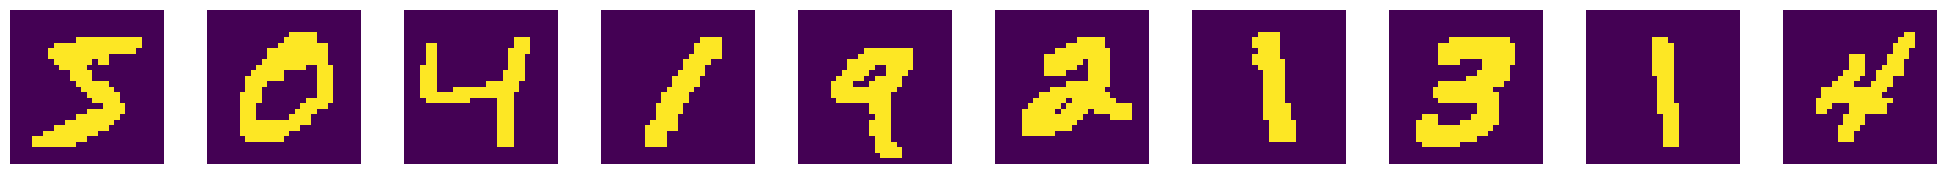

<IPython.core.display.Javascript object>

In [73]:
plot_images(x_train[:10])

In [97]:
calc_noise_robustness(sp, x_train[0:5])

0it [00:00, ?it/s]/Users/moritzeich/dev/bachelor-thesis-research/util/metrics.py:35: IntegrationWarning: The maximum number of subdivisions (50) has been achieved.
  If increasing the limit yields no improvement it is advised to analyze 
  the integrand in order to determine the difficulties.  If the position of a 
  local difficulty can be determined (singularity, discontinuity) one will 
  probably gain from splitting up the interval and calling the integrator 
  on the subranges.  Perhaps a special-purpose integrator should be used.
  integral, _ = quad(integrant, 0, 1, limit=10)
1it [00:07,  7.68s/it]

0.03956110570235269
0.005987416639224296


2it [00:15,  7.59s/it]

0.044090070797975923
0.0024291276382199106


3it [00:22,  7.57s/it]

0.06329970432253704
0.0030560698220077967


4it [00:30,  7.58s/it]

0.056095278820853696
0.009388016253669001


5it [00:37,  7.60s/it]

0.04290833976502083
0.006511200834236682


0.04919089988174803

<IPython.core.display.Javascript object>

In [99]:
sdrs = np.zeros((5, sp.number_of_columns), dtype=int)

for idx, input_vector in enumerate(x_train[:5]):
    winning_columns = sp.compute(input_vector, learn=False)
    sdr = sp.top_columns_to_sdr(winning_columns)

    sdrs[idx, :] = sdr

<IPython.core.display.Javascript object>

In [101]:
sdrs.shape

(5, 1024)

<IPython.core.display.Javascript object>

In [112]:
test_sdr = sdrs[0]
no_bits = test_sdr.sum()
no_bits

overlap_frac = []

for noise_level in range(0, 11):
    noisy_input = add_noise(x_train[0], noise_level / 10)
    noisy_winning_columns = sp.compute(noisy_input, learn=False)
    noisy_sdr = sp.top_columns_to_sdr(noisy_winning_columns)

noisy_inp = add_noise(x_train[0], 0.1)


TypeError: add_noise() missing 1 required positional argument: 'k'

<IPython.core.display.Javascript object>